# Pengantar Analisis Teks

Berikut adalah contoh kode Python untuk proses analisis data teks dengan langkah-langkah: pengumpulan data, preprocessing teks, eksplorasi data, dan analisis dasar. Kita akan menggunakan beberapa pustaka populer seperti nltk, spaCy, dan wordcloud. Karena ini adalah contoh, kita akan menggunakan dataset ulasan teks sederhana.

Pastikan pustaka berikut terinstal sebelum menjalankan kode:

pip install nltk spacy wordcloud sklearn matplotlib pandas

python -m spacy download en_core_web_sm


In [8]:
import subprocess
import sys

# Daftar pustaka yang dibutuhkan
libraries = [
    "nltk",
    "spacy",
    "wordcloud",
    "sklearn",
    "matplotlib",
    "pandas",
    "Sastrawi"
]

# Fungsi untuk menginstal pustaka jika belum terinstal
def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Mengecek dan menginstal pustaka jika perlu
for lib in libraries:
    try:
        __import__(lib)
        print(f"{lib} sudah terinstal.")
    except ImportError:
        print(f"{lib} belum terinstal. Menginstal {lib}...")
        install_package(lib)

# Instalasi model bahasa Inggris untuk spaCy
try:
    import spacy
    nlp = spacy.load("en_core_web_sm")
    print("Model spaCy 'en_core_web_sm' sudah terinstal.")
except (ImportError, OSError):
    print("Model spaCy 'en_core_web_sm' belum terinstal. Menginstal model...")
    subprocess.check_call([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])

print("Proses instalasi selesai.")


nltk sudah terinstal.
spacy sudah terinstal.
wordcloud sudah terinstal.
sklearn sudah terinstal.
matplotlib sudah terinstal.
pandas sudah terinstal.
Sastrawi belum terinstal. Menginstal Sastrawi...
Model spaCy 'en_core_web_sm' sudah terinstal.
Proses instalasi selesai.


**1. Pengumpulan Data Teks**

Data ulasan dari internet biasanya dikumpulkan menggunakan API atau teknik scraping. Dalam contoh ini, kita akan menggunakan beberapa ulasan sederhana yang disimpan dalam bentuk list.

In [ ]:
# Data contoh
data_ulasan = [
    "Produk ini sangat bagus! Sangat membantu dan mudah digunakan.",
    "Saya tidak puas dengan kualitas produk ini, tidak sesuai dengan ekspektasi.",
    "Layanan pelanggan sangat ramah dan responsif.",
    "Produk mudah digunakan, namun daya tahan perlu ditingkatkan.",
    "Sangat kecewa dengan produk ini, tidak sesuai deskripsi."
]

print(data_ulasan)

['Produk ini sangat bagus! Sangat membantu dan mudah digunakan.', 'Saya tidak puas dengan kualitas produk ini, tidak sesuai dengan ekspektasi.', 'Layanan pelanggan sangat ramah dan responsif.', 'Produk mudah digunakan, namun daya tahan perlu ditingkatkan.', 'Sangat kecewa dengan produk ini, tidak sesuai deskripsi.']


**2. Preprocessing Teks**

Preprocessing meliputi tokenisasi, penghapusan stop words, normalisasi, stemming, dan lemmatization.

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Download stopwords bahasa Indonesia dari NLTK
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words("indonesian"))

# Inisialisasi stemmer Sastrawi untuk bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi preprocessing teks
def preprocess_text(text):
    # Menghapus URL dan mention
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  
    text = re.sub(r'\@\w+|\#','', text)  
    # Mengubah teks ke huruf kecil
    text = text.lower()
    # Menghapus tanda baca
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenisasi dan penghapusan stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming menggunakan Sastrawi
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Contoh penggunaan
sample_text = "Produk ini sangat membantu dalam pekerjaan sehari-hari dan mudah digunakan."
cleaned_text = preprocess_text(sample_text)
print("Teks setelah preprocessing:", cleaned_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Teks setelah preprocessing: produk bantu kerja seharihari mudah


In [11]:
# Proses data ulasan
processed_ulasan = [preprocess_text(ulasan) for ulasan in data_ulasan]
print("Teks setelah preprocessing:", processed_ulasan)

Teks setelah preprocessing: ['produk bagus bantu mudah', 'puas kualitas produk sesuai ekspektasi', 'layan langgan ramah responsif', 'produk mudah daya tahan tingkat', 'kecewa produk sesuai deskripsi']


**3. Eksplorasi Data Teks**

Di sini kita akan menghitung frekuensi kata, panjang rata-rata dokumen, dan membuat word cloud untuk visualisasi kata yang sering muncul.

Frekuensi Kata: Counter({'produk': 4, 'mudah': 2, 'sesuai': 2, 'bagus': 1, 'bantu': 1, 'puas': 1, 'kualitas': 1, 'ekspektasi': 1, 'layan': 1, 'langgan': 1, 'ramah': 1, 'responsif': 1, 'daya': 1, 'tahan': 1, 'tingkat': 1, 'kecewa': 1, 'deskripsi': 1})
Panjang rata-rata dokumen: 4.4


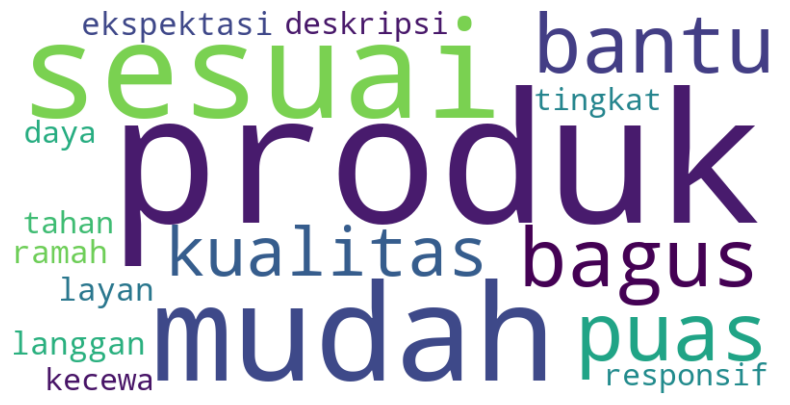

In [14]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Menggabungkan semua kata dari ulasan yang sudah diproses
all_words = ' '.join(processed_ulasan)

# Menghitung frekuensi kata menggunakan Counter
word_freq = Counter(all_words.split())

# Menampilkan frekuensi kata
print("Frekuensi Kata:", word_freq)

# Panjang rata-rata dokumen
avg_length = sum(len(ulasan.split()) for ulasan in processed_ulasan) / len(processed_ulasan)
print("Panjang rata-rata dokumen:", avg_length)

# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


**4. Analisis Dasar Teks**

Dalam analisis dasar ini, kita akan melakukan analisis sentimen sederhana, analisis N-gram, dan topik modeling.

Pastikan pustaka yang dibutuhkan telah terinstal, seperti TextBlob (untuk analisis sentimen), nltk (untuk n-gram), dan scikit-learn (untuk LDA).


*a. Analisis Sentimen*

Analisis Sentimen Menggunakan TextBlob

Analisis sentimen dapat dilakukan dengan TextBlob untuk mengetahui apakah ulasan cenderung positif, negatif, atau netral.

In [16]:
from textblob import TextBlob

# Fungsi untuk mendapatkan sentimen
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positif"
    elif analysis.sentiment.polarity == 0:
        return "Netral"
    else:
        return "Negatif"

# Aplikasi analisis sentimen pada setiap ulasan
df_sentiment = [{"Ulasan": ulasan, "Sentimen": get_sentiment(ulasan)} for ulasan in processed_ulasan]
for item in df_sentiment:
    print(item)


{'Ulasan': 'produk bagus bantu mudah', 'Sentimen': 'Netral'}
{'Ulasan': 'puas kualitas produk sesuai ekspektasi', 'Sentimen': 'Netral'}
{'Ulasan': 'layan langgan ramah responsif', 'Sentimen': 'Netral'}
{'Ulasan': 'produk mudah daya tahan tingkat', 'Sentimen': 'Netral'}
{'Ulasan': 'kecewa produk sesuai deskripsi', 'Sentimen': 'Netral'}


Jika analisis tidak sesuai Ekspektasi, perlu ada perbaikan metode/model yang digunakan

*b. Analisis N-Gram*

Untuk analisis n-gram, kita dapat menggunakan nltk untuk mengidentifikasi pasangan kata (bigram) atau kelompok tiga kata (trigram) yang sering muncul.

In [17]:
from nltk import ngrams
from collections import Counter

# Fungsi untuk mendapatkan n-gram dari data
def get_ngrams(data, n):
    n_grams = [ngrams(ulasan.split(), n) for ulasan in data]
    n_grams_flat = [item for sublist in n_grams for item in sublist]
    return Counter(n_grams_flat)

# Menghitung frekuensi bigram dan trigram
bigram_freq = get_ngrams(processed_ulasan, 2)
trigram_freq = get_ngrams(processed_ulasan, 3)

print("Bigram yang sering muncul:", bigram_freq.most_common(5))
print("Trigram yang sering muncul:", trigram_freq.most_common(5))


Bigram yang sering muncul: [(('produk', 'sesuai'), 2), (('produk', 'bagus'), 1), (('bagus', 'bantu'), 1), (('bantu', 'mudah'), 1), (('puas', 'kualitas'), 1)]
Trigram yang sering muncul: [(('produk', 'bagus', 'bantu'), 1), (('bagus', 'bantu', 'mudah'), 1), (('puas', 'kualitas', 'produk'), 1), (('kualitas', 'produk', 'sesuai'), 1), (('produk', 'sesuai', 'ekspektasi'), 1)]


*c. Topik Modeling Menggunakan Latent Dirichlet Allocation (LDA)*

Kita akan menggunakan LDA dari scikit-learn untuk melakukan topik modeling pada data ulasan yang sudah diproses. CountVectorizer akan digunakan untuk mengubah teks menjadi representasi angka yang diperlukan oleh LDA.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Mengonversi teks menjadi representasi berbasis frekuensi kata
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_ulasan)

# Menentukan jumlah topik
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# Menampilkan topik
def display_topics(model, feature_names, no_top_words):
    for index, topic in enumerate(model.components_):
        print(f"Topik {index + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[-no_top_words:]]))

no_top_words = 1
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)


Topik 1:
produk
Topik 2:
mudah


In [23]:
no_top_words = 2
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

Topik 1:
sesuai produk
Topik 2:
produk mudah


In [24]:
no_top_words = 3
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

Topik 1:
puas sesuai produk
Topik 2:
tingkat produk mudah


In [25]:
no_top_words = 4
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

Topik 1:
ekspektasi puas sesuai produk
Topik 2:
tahan tingkat produk mudah


In [26]:
no_top_words = 5
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

Topik 1:
kualitas ekspektasi puas sesuai produk
Topik 2:
daya tahan tingkat produk mudah
